# Unsupervised Learning: Clustering Lab





In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

C:\Users\hende\AppData\Local\Temp\ipykernel_21592\14372169.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1) 

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [2]:
# K-means with Abalone
abalone_arff = arff.loadarff('abalone.arff')
abalone_df = pd.DataFrame(abalone_arff[0])
abalone_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
...,...,...,...,...,...,...,...,...
195,0.500,0.405,0.155,0.7720,0.3460,0.1535,0.245,12.0
196,0.505,0.410,0.150,0.6440,0.2850,0.1450,0.210,11.0
197,0.640,0.500,0.185,1.3035,0.4445,0.2635,0.465,16.0
198,0.560,0.450,0.160,0.9220,0.4320,0.1780,0.260,15.0


In [4]:
kmeans = KMeans(n_clusters=3, init='random', n_init=1)
kmeans.fit(abalone_df)

# print(kmeans.labels_)
# print(kmeans.cluster_centers_)
# print(kmeans.n_iter_)
# print(kmeans.inertia_)
# print(silhouette_score(abalone_df, kmeans.labels_))

print("Lables: ", kmeans.labels_)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Number of Iterations: ", kmeans.n_iter_)
print("Inertia: ", kmeans.inertia_)
print("Silhouette Score: ", silhouette_score(abalone_df, kmeans.labels_))

Lables:  [0 1 1 1 1 1 2 2 1 2 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 2 2 0 1 2
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 2 0
 0 0 1 1 0 0 1 0 2 2 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1
 1 1 0 1 1 1 0 1 0 2 0 0 0 0 0 2 2 0 2 2 0 0 0 1 1 1 1 1 1 1 1 0 0 2 1 1 0
 0 0 1 0 1 0 0 0 1 1 0 0 2 0 1]
Cluster Centers:  [[ 0.58149254  0.45783582  0.15925373  1.04853731  0.41058209  0.22826866
   0.33541045 12.73134328]
 [ 0.44221239  0.3439823   0.11331858  0.49762832  0.20678319  0.11430973
   0.15534513  8.24778761]
 [ 0.629       0.50125     0.1745      1.434075    0.526575    0.28175
   0.527325   18.1       ]]
Number of Iterations:  5
Inertia:  535.0125970533664
Silhouette Score:  0.528017697521077


*Discussion*

It is difficult to say much about the labels and cluster centers without being able to visualize the data. However, the inertia and silhouette score can be used to analyze the quality of the clustering. The inertia is the sum of the squared error for each point from its cluster center. So, a lower inertia is better. In this case, the inertia is about 535, which does not seem too good. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, so it will be easier to interpret. The silhouette score ranges from -1 to 1, where a higher score is better. In this case, the silhouette score is about 0.528, which is pretty good, but could be better.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC) 

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [5]:
# HAC with Abalone

hac = AgglomerativeClustering(n_clusters=3, linkage='complete')
hac.fit(abalone_df)

print("Lables: ", hac.labels_)
print("Silhouette Score: ", silhouette_score(abalone_df, hac.labels_))

Lables:  [1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]
Silhouette Score:  0.5398112398376158


*Discussion*

HAC is an alternative to K-means, so it is interesting to compare the results. The silhouette score is about 0.539, which is slightly better than the K-means score. This suggests that HAC is a better clustering algorithm for this dataset. However, the difference is not very large, so it is possible that K-means could be better with different parameters or more iterations.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [ ]:
# K-means initial centroid experiments

iris_arff = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_arff[0])
iris_df.drop(columns='class', inplace=True)
iris_df

In [11]:
print("| Run | Inertia | Silhouette Score |")
print("| --- | ------- | ---------------- |")
for i in range(5):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1).fit(iris_df)
    # print("Inertia: ", kmeans.inertia_)
    # print("Silhouette Score: ", silhouette_score(iris_df, kmeans.labels_))
    print(f"| {i+1} | {kmeans.inertia_:0.3f} | {silhouette_score(iris_df, kmeans.labels_):0.3f} |")

| Run | Inertia | Silhouette Score |
| --- | ------- | ---------------- |
| 1 | 57.473 | 0.495 |
| 2 | 71.661 | 0.412 |
| 3 | 57.345 | 0.497 |
| 4 | 57.345 | 0.497 |
| 5 | 71.348 | 0.415 |


In [12]:
kmeans = KMeans(n_clusters=4, init='random', n_init=5).fit(iris_df)

print("Inertia: ", kmeans.inertia_)
print("Silhouette Score: ", silhouette_score(iris_df, kmeans.labels_))

Inertia:  57.34540931571816
Silhouette Score:  0.4972279726640147


In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1).fit(iris_df)

print("Inertia: ", kmeans.inertia_)
print("Silhouette Score: ", silhouette_score(iris_df, kmeans.labels_))

Inertia:  57.31787321428571
Silhouette Score:  0.4978256901095472


Results and Discussion

| Run | Inertia | Silhouette Score |
| --- | ------- | ---------------- |
| 1 | 57.473 | 0.495 |
| 2 | 71.661 | 0.412 |
| 3 | 57.345 | 0.497 |
| 4 | 57.345 | 0.497 |
| 5 | 71.348 | 0.415 |

With n_init=5:
- Best Inertia: 57.345
- Best Silhouette Score: 0.497

With init='K-means++':
- Inertia: 57.318
- Silhouette Score: 0.498

Out of the 5 initial runs, two of them had the same inertia and silhouette score, which was also the best score. The other three runs had slightly worse scores (two of them much worse). The best run had an inertia of 57.345 and a silhouette score of 0.497. Again, the silhouette score is a good representation of the quality of the clustering. A silhouette score of 0.497 is pretty good, but could be better. 

With n_init=5, the best inertia was 57.345 and the best silhouette score was 0.497. This is the same as the best run from the 5 initial runs, which is expected since n_init=5 will return the best run out of 5 runs.

With init='K-means++', the inertia was 57.318 and the silhouette score was 0.498. This is slightly better than the best run from the 5 initial runs, but not by much. This suggests that the K-means++ initialization method is not much better than the random initialization method. However, sometimes even a small increase in the silhouette score can be important, so it may be worth using K-means++.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


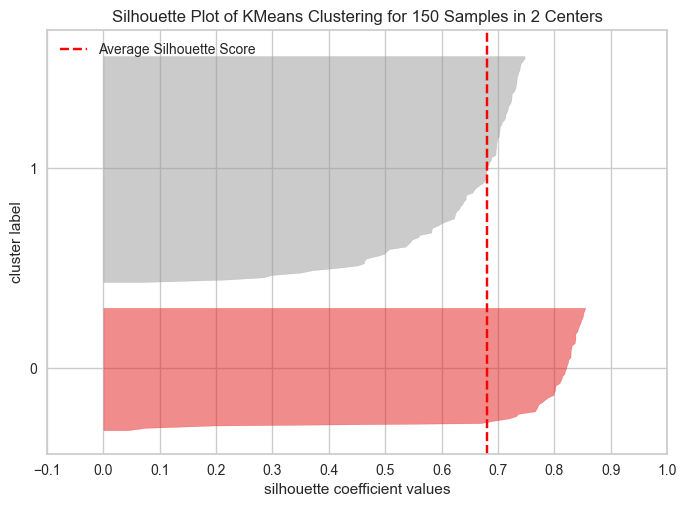

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


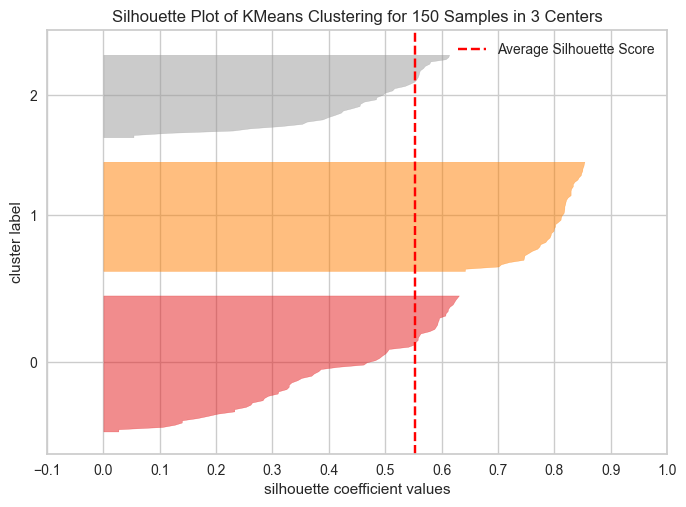

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


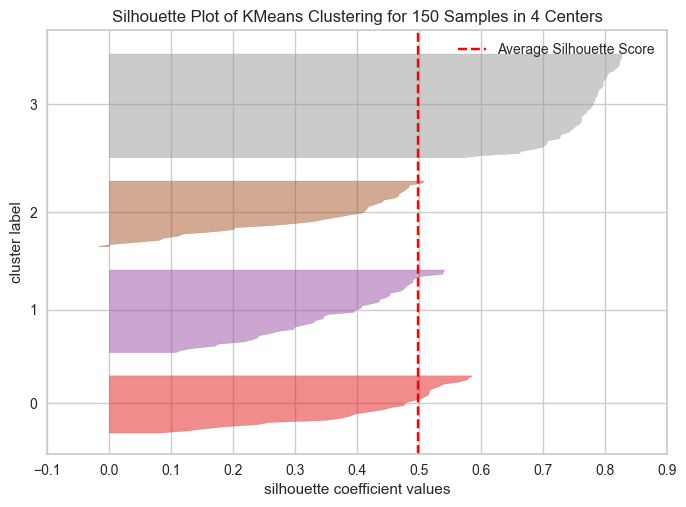

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


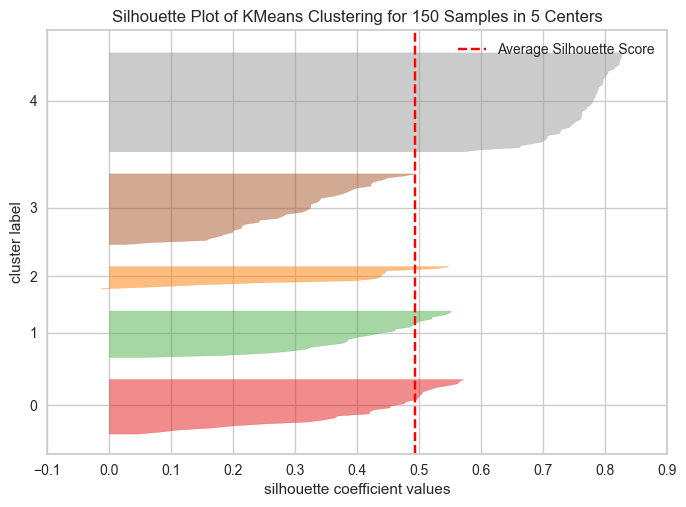

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


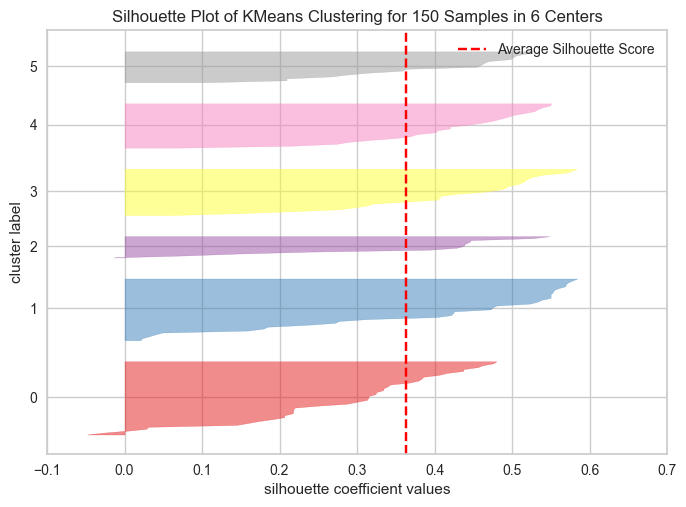

k = 2; Inertia: 152.369; Silhouette Score: 0.681
k = 3; Inertia: 78.941; Silhouette Score: 0.553
k = 4; Inertia: 57.318; Silhouette Score: 0.498
k = 5; Inertia: 46.562; Silhouette Score: 0.493
k = 6; Inertia: 39.252; Silhouette Score: 0.363


In [18]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

k_values = range(2, 7)
score_messages = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10).fit(iris_df)
    score_messages.append(f"k = {k}; Inertia: {kmeans.inertia_:0.3f}; Silhouette Score: {silhouette_score(iris_df, kmeans.labels_):0.3f}")
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(iris_df)
    visualizer.show()

for message in score_messages:
    print(message)

Discuss your results and justify which clustering is best based on the silhouette graphs

All the graphs where k>3 have a silhouette score lower than 0.5. While their inertia values are lower than the k=2 and k=3 graphs, the silhouette graphs show that the clusters are not well defined. Several of the clusters have negative silhouette scores, and the cluster sizes are inconsistent.

The k=2 graph has a silhouette score of 0.681, which is the highest of all the graphs. The inertia is also the highest, but this is expected since the inertia will decrease as k increases. The silhouette graph shows that one cluster is much larger and less defined than the other, which is not ideal.

On the other hand, the k=3 graph has a silhouette score of 0.553, which is the second highest of all the graphs. The inertia is also the second highest. The silhouette graph shows that the clusters are more consistent in size, but there is clearly one very well defined cluster and two poorly defined clusters, which is not ideal.

It's between the k=2 and k=3 graphs, but the k=2 graph is slightly better. The silhouette score is higher and the clusters are more defined. The k=3 graph has more consistent cluster sizes, but the clusters are not as well defined. The k=2 graph is the best clustering based on the silhouette graphs.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [ ]:
#HAC with Iris

*Discussion and linkage comparison*

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [ ]:
# Run both algoriths on a data set of your choice

*Discussion and comparison*

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm 
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm 

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

Discussion and comparision of each model implemented

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        
    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass